In [18]:
!pip install -qq transformers
!pip install gdown
!pip install torch


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/74/07/edce54779f5c3fe8ab8390eafad3d7c8190fce68f922a254ea77f4a94a99/torch-2.1.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     - -------------------------------------- 0.2/5.7 MB 4.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.4/5.7 MB 6.3 MB/s eta 0:00:01
     ----- ---------------------------------- 0.7/5.7 MB 7.7 MB/s eta 0:00:01
     ------- -------------------------------- 1.1/5.7 MB 8.0 MB/s eta 0:00:01
     -------- ------------------------------- 1.2/5.7 MB 7.6 MB/s eta 0:00:01
     -------------- ------------------------- 2.1/5.7 MB 9.4 MB/s eta 0:00:01
     ---------------- ----------------------- 2.4/5.7 MB 8.6 MB/s eta 0:00:01
     ----------------------- ---------------- 3.3/5.7 MB 10.6 MB/s eta 0:00:01
     -------------------------- ------------- 3.8/5.7 MB 10.5 MB/s eta 0:00:01
     ----------------

In [4]:
!gdown --id 1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
!gdown --id 1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv

C:\Users\91999\AppData\Local\Programs\Python\Python311\Lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
To: C:\Users\91999\Documents\kath\3\apps.csv

  0%|          | 0.00/134k [00:00<?, ?B/s]
100%|##########| 134k/134k [00:00<00:00, 1.16MB/s]
100%|##########| 134k/134k [00:00<00:00, 1.16MB/s]
C:\Users\91999\AppData\Local\Programs\Python\Python311\Lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: C:\Users\91999\Documents\kath\3\reviews.csv

  0%|          | 0.00/7.17M [00:00<?, ?B/s]
  7%|7         | 524k/7.17M [00:00<00:02, 3.13

In [5]:
import pandas as pd
df = pd.read_csv("reviews.csv")
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [6]:
df.shape

(15746, 11)

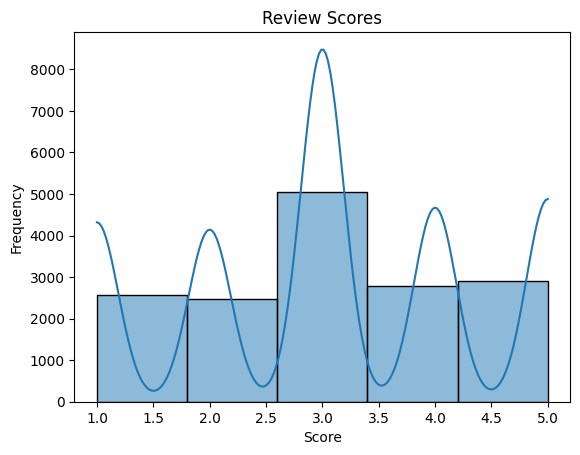

Most Common Score: 3


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['score'], bins=5, kde=True)  # Using sns.histplot() instead of sns.distplot()
plt.title("Review Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Calculate and print the most common score
common_score = df['score'].value_counts().idxmax()
print("Most Common Score:", common_score)

In [10]:
def to_sentiment(rating):
    rating = int(rating)
    if rating <= 2:
        return 0  # Negative sentiment
    elif rating == 3:
        return 1  # Neutral sentiment
    else:
        return 2  # Positive sentiment

In [11]:
df['sentiment'] = df.score.apply(to_sentiment)

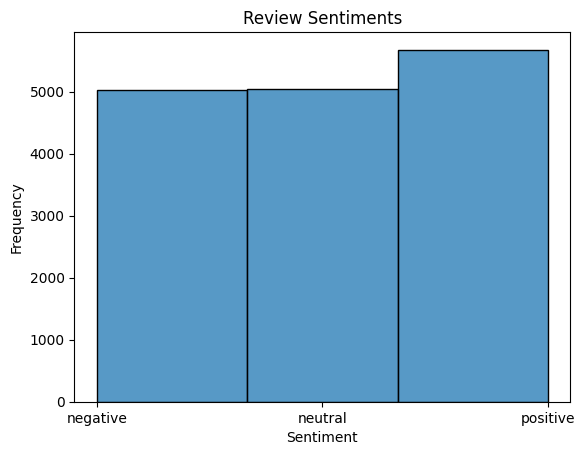

In [13]:
class_names = ['negative', 'neutral', 'positive']

sns.histplot(df['sentiment'], bins=3, kde=False)  # Using sns.histplot(), setting kde=False
plt.title("Review Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2], class_names)  # Setting ticks to class names
plt.show()

In [14]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

C:\Users\91999\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91999\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [15]:
sample_txt = 'The sun is shining, and the birds are singing in the park.'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [29]:
encoding = tokenizer.encode_plus(
    sample_txt,
    max_length=32,
    add_special_tokens=True,
    return_token_type_ids=False,
    padding="max_length",  # Use "max_length" for padding
    truncation=True,       # Explicitly set truncation to True
    return_attention_mask=True,
    return_tensors='pt'
)

encoding.keys()

ImportError: Unable to convert output to PyTorch tensors format, PyTorch is not installed.

In [30]:
print("Original : ", sample_txt)
print("Tokens   : ", tokens)
print("Token IDs: ", token_ids)
print("Token IDs (Padded) : ", encoding['input_ids'][0])

# Invert the encoded token IDs
print(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))

Original :  The sun is shining, and the birds are singing in the park.
Tokens   :  ['The', 'sun', 'is', 'shining', ',', 'and', 'the', 'birds', 'are', 'singing', 'in', 'the', 'park', '.']
Token IDs:  [1109, 3336, 1110, 10825, 117, 1105, 1103, 4939, 1132, 4241, 1107, 1103, 2493, 119]


NameError: name 'encoding' is not defined